In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [160]:
dataset_training = pd.read_csv('Train.csv')

In [3]:
dataset_training.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
dataset_test = pd.read_csv('Test.csv')
dataset_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
dataset_training.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
dataset = pd.concat(objs=[dataset_training, dataset_test], axis=0).reset_index(drop=True)

In [7]:
dataset.shape

(14204, 12)

In [8]:
dataset

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1


In [9]:
dataset.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


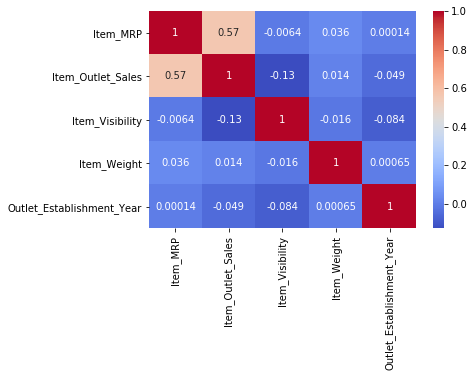

In [11]:
sns.heatmap(data=dataset.corr(), cmap='coolwarm', annot=True)

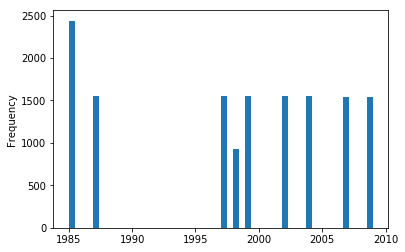

In [12]:
dataset['Outlet_Establishment_Year'].plot('hist', bins=50)

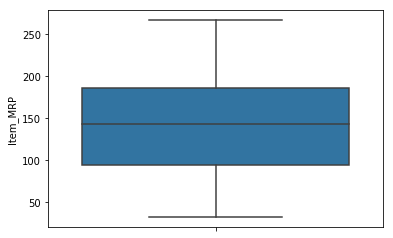

In [13]:
#Box plot to see any outliers 
sns.boxplot(y='Item_MRP', data=dataset)

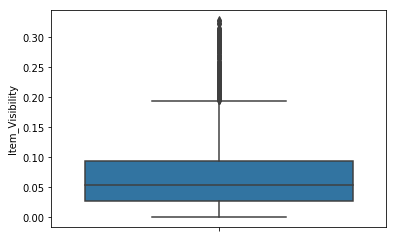

In [14]:
sns.boxplot(y='Item_Visibility', data=dataset)

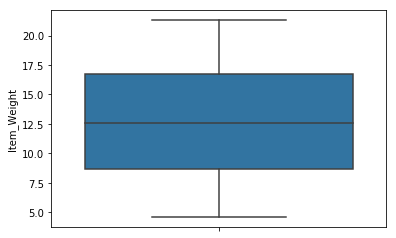

In [15]:
sns.boxplot(y='Item_Weight', data=dataset)

In [161]:
#outlier_detection
from collections import Counter
def detect_outliers(df, n ,features):
    outlier_indices = []
    
    for col in features:
        
        #1st quartile
        Q1 = np.percentile(df[col], 25)
        
        #3rd quartile
        Q3 = np.percentile(df[col], 75)
        
        #IQR
        IQR = Q3 - Q1
        
        #outlier_step
        outlier_step = 1.5 * IQR
        
        outlier_list_index = df[(df[col]<Q1-outlier_step)|(df[col]>Q3+outlier_step)].index
        outlier_indices.extend(outlier_list_index)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k,v in outlier_indices.items() if v>n)
    return multiple_outliers
outliers_to_drop = detect_outliers(df=dataset, n=2, features=['Item_MRP','Item_Visibility','Item_Weight'])

In [162]:
dataset.loc[outliers_to_drop]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Identifier_grouped,Outlet_Age


The above one shows that there is no outlier in the dataset

In [18]:
dataset.isnull().sum().sort_values(ascending=False)

Item_Outlet_Sales            5681
Outlet_Size                  4016
Item_Weight                  2439
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Item_Identifier                 0
Item_Fat_Content                0
dtype: int64

In [19]:
percent_1 = (dataset.isnull().sum()/dataset.isnull().count())*100
print(round(percent_1, 2).sort_values(ascending=False))

Item_Outlet_Sales            40.00
Outlet_Size                  28.27
Item_Weight                  17.17
Outlet_Type                   0.00
Outlet_Location_Type          0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Item_Identifier               0.00
Item_Fat_Content              0.00
dtype: float64


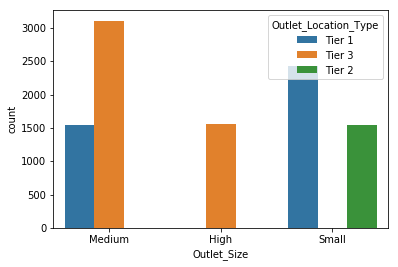

In [20]:
#outlet size
sns.countplot(x='Outlet_Size',hue='Outlet_Location_Type', data=dataset )

From this graph we can say that Tier 2 is only in Small outlet size. High Outlet_size only contain tier3. But Tier1 is in both medium and small outlet_size

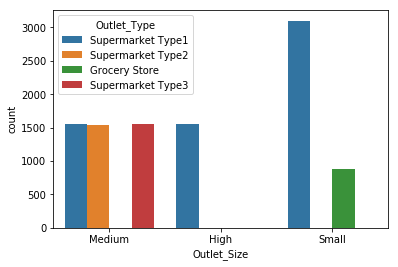

In [21]:
sns.countplot(x='Outlet_Size', hue='Outlet_Type', data=dataset)

From the above plot we can say that Supermarket2 only in Medium Outlet size. Grocery is in Small outlet_size. But supermarket1 is in all outlet_size

So from the above two plots:
small Outlet_size = Tier2 only, Grocery only.. (ie) Grocery OR tier 2
Medium Outlet_size = SuperMarket type3 only , supermarket type2 only
High outlet_size = supermarket type1, tier3

In [22]:
dataset['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [23]:
dataset.groupby('Outlet_Type').Outlet_Size.value_counts(dropna=False)

Outlet_Type        Outlet_Size
Grocery Store      NaN             925
                   Small           880
Supermarket Type1  Small          3100
                   NaN            3091
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

We can see that the Most of the missing values are from Grocery_Store and SuperMarket Type1. But from the plot we can see that grocery store is only in small and most of the SuperMarket type 1 is in small. so we can replace the NaN values with small

In [24]:
dataset['Outlet_Size'].fillna('Small', inplace=True)

In [25]:
dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [26]:
dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(), inplace=True)

In [27]:
dataset.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
dtype: int64

Now we can see that there is no null values in Outlet_Size and Item_Weight

In [28]:
dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [29]:
dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [30]:
dataset['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

We can see that there are only two different categories which is Low Fat and Regular but with different spelling. We have to change the others to make it correctly spelled.

In [31]:
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace({
                                                        'low fat' : 'Low_Fat',
                                                        'LF' : 'Low_Fat',
                                                        'reg': 'Regular',
                                                        'Low Fat' : 'Low_Fat'
})

In [32]:
dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low_Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low_Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store
4,Low_Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [33]:
dataset['Item_Fat_Content'].unique()

array(['Low_Fat', 'Regular'], dtype=object)

Now we can see that only two unique objects in Item_Fat_Content

In [34]:
(dataset['Item_Visibility']==0.000000).value_counts()

False    13325
True       879
Name: Item_Visibility, dtype: int64

We can see that there are 879 items are marked as 0.000000 in Item visibility which is not going to help the Item_MRP. so we replace the 0.000000 with mean of the other data.

In [35]:
for i in range(0, len(dataset['Item_Visibility'])):
    if dataset['Item_Visibility'][i] == 0.000000 :
        dataset['Item_Visibility'][i] = dataset['Item_Visibility'].mean()
    else:
        continue

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [36]:
dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low_Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low_Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.20,1998,OUT010,Tier 3,Small,Grocery Store
4,Low_Fat,NCD19,53.8614,994.7052,Household,0.065957,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


Now we can see that the Item_Visibility with 0.000000 are changed with its mean.

We can look at the Item Identifier we can look at it and we can change and group it

In [37]:
dataset['Item_Identifier_grouped'] = dataset['Item_Identifier'].apply(lambda x : x[0:2])

In [38]:
dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Identifier_grouped
0,Low_Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,FD
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,DR
2,Low_Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,FD
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.20,1998,OUT010,Tier 3,Small,Grocery Store,FD
4,Low_Fat,NCD19,53.8614,994.7052,Household,0.065957,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,NC


In [39]:
dataset['Item_Identifier_grouped'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier_grouped, dtype: int64

We can see that there is only three types of Item_Identification and now we can replace with some meaningful name as FD into Food, DR into Drinks and NC into Non Consumables

In [40]:
dataset['Item_Identifier_grouped'] = dataset['Item_Identifier_grouped'].replace({
                                                                                  'FD' : 'Food',
                                                                                  'DR' : 'Drinks',
                                                                                  'NC' : 'Non Consumables'
                                                                                })

In [41]:
dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Identifier_grouped
0,Low_Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Drinks
2,Low_Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.20,1998,OUT010,Tier 3,Small,Grocery Store,Food
4,Low_Fat,NCD19,53.8614,994.7052,Household,0.065957,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Non Consumables


In [42]:
dataset['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

We can see that there are many Item_Type is there. We can group this together.

Food Item : Snack Foods, Frozen Foods, Starchy Foods,Fruits and Vegetables, Breakfast, Seafood, Meat, Breads, Health and Hygiene, Dairy

Drinks : Soft Drinks, Hard Drinks

Non_Consumables :  Household, Others, Baking Goods, Canned

In [43]:
dataset['Item_Type'] = dataset['Item_Type'].replace({
                                        'Fruits and Vegetables' : 'Food_Item',
                                        'Snack Foods' : 'Food_Item',
                                        'Frozen Foods' : 'Food_Item',
                                        'Starchy Foods' : 'Food_Item',
                                        'Breakfast' : 'Food_Item',
                                        'Seafood' : 'Food_Item',
                                        'Meat' : 'Food_Item',
                                        'Breads' : 'Food_Item',
                                        'Health and Hygiene' : 'Food_Item',
                                        'Dairy' : 'Food_Item',
                                        'Soft Drinks' : 'Drinks',
                                        'Hard Drinks' : 'Drinks',
                                        'Household' : 'Non_Consumables',
                                        'Baking Goods' : 'Non_Consumables',
                                        'Canned' : 'Non_Consumables',
                                        'Others' : 'Non_Consumables'    
                                        })

In [44]:
dataset['Item_Type'].value_counts()

Food_Item          9118
Non_Consumables    3998
Drinks             1088
Name: Item_Type, dtype: int64

Now we can see that there are only Three items in the Item_type list

In [45]:
dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Identifier_grouped
0,Low_Fat,FDA15,249.8092,3735.1380,Food_Item,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food
1,Regular,DRC01,48.2692,443.4228,Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Drinks
2,Low_Fat,FDN15,141.6180,2097.2700,Food_Item,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food
3,Regular,FDX07,182.0950,732.3800,Food_Item,0.065953,19.20,1998,OUT010,Tier 3,Small,Grocery Store,Food
4,Low_Fat,NCD19,53.8614,994.7052,Non_Consumables,0.065957,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Non Consumables


In [46]:
dataset['Outlet_Age'] = 2013 - dataset['Outlet_Establishment_Year']

In [47]:
dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Identifier_grouped,Outlet_Age
0,Low_Fat,FDA15,249.8092,3735.1380,Food_Item,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
1,Regular,DRC01,48.2692,443.4228,Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Drinks,4
2,Low_Fat,FDN15,141.6180,2097.2700,Food_Item,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
3,Regular,FDX07,182.0950,732.3800,Food_Item,0.065953,19.20,1998,OUT010,Tier 3,Small,Grocery Store,Food,15
4,Low_Fat,NCD19,53.8614,994.7052,Non_Consumables,0.065957,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Non Consumables,26


In [48]:
dataset['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT046    1550
OUT035    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [49]:
#Categorical variables
#Item_Fat_Content_categorical
Item_Fat_Content_categorical = pd.get_dummies(dataset.Item_Fat_Content, prefix='Item_Fat_Content')
Item_Fat_Content_categorical.head()

,Item_Fat_Content_Low_Fat,Item_Fat_Content_Regular
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [50]:
Item_Fat_Content_categorical = Item_Fat_Content_categorical['Item_Fat_Content_Low_Fat']
Item_Fat_Content_categorical.head()

0    1
1    0
2    1
3    0
4    1
Name: Item_Fat_Content_Low_Fat, dtype: uint8

In [51]:
#Item_Type_categorical
Item_Type_categorical = pd.get_dummies(dataset.Item_Type, prefix='Item_Type')
Item_Type_categorical.head()

,Item_Type_Drinks,Item_Type_Food_Item,Item_Type_Non_Consumables
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1


In [52]:
Item_Type_categorical.shape

(14204, 3)

In order to reduce the dummy trap we have to cut down one column of every categorical variable

In [53]:
Item_Type_categorical = Item_Type_categorical[['Item_Type_Drinks','Item_Type_Food_Item']]
Item_Type_categorical.head()

,Item_Type_Drinks,Item_Type_Food_Item
0,0,1
1,1,0
2,0,1
3,0,1
4,0,0


In [54]:
#Outlet_Identifier_categorical
Outlet_Identifier_categorical = pd.get_dummies(dataset.Outlet_Identifier, prefix='Outlet_Identifier')
Outlet_Identifier_categorical.head()

,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [55]:
Outlet_Identifier_categorical = Outlet_Identifier_categorical[['Outlet_Identifier_OUT013','Outlet_Identifier_OUT017',
                                                               'Outlet_Identifier_OUT018','Outlet_Identifier_OUT019',
                                                               'Outlet_Identifier_OUT027','Outlet_Identifier_OUT035',
                                                               'Outlet_Identifier_OUT045','Outlet_Identifier_OUT046',
                                                               'Outlet_Identifier_OUT049']]
Outlet_Identifier_categorical.head()

,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [56]:
#Outlet_Location_Type_categorical
Outlet_Location_Type_categorical = pd.get_dummies(dataset.Outlet_Location_Type, prefix='Outlet_Location_Type')
Outlet_Location_Type_categorical.head()

,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


In [57]:
Outlet_Location_Type_categorical = Outlet_Location_Type_categorical[['Outlet_Location_Type_Tier 1','Outlet_Location_Type_Tier 2']]
Outlet_Location_Type_categorical.head()

,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0


In [58]:
#Outlet_Size_categorical
Outlet_Size_categorical = pd.get_dummies(dataset.Outlet_Size, prefix='Outlet_Size')
Outlet_Size_categorical.head()

,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,1,0,0


In [59]:
Outlet_Size_categorical = Outlet_Size_categorical[['Outlet_Size_High','Outlet_Size_Medium']]
Outlet_Size_categorical.head()

,Outlet_Size_High,Outlet_Size_Medium
0,0,1
1,0,1
2,0,1
3,0,0
4,1,0


In [60]:
#Outlet_Type_categorical
Outlet_Type_categorical = pd.get_dummies(dataset.Outlet_Type, prefix='Outlet_Type')
Outlet_Type_categorical.head()

,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [61]:
Outlet_Type_categorical = Outlet_Type_categorical[['Outlet_Type_Grocery Store','Outlet_Type_Supermarket Type1',
                                                   'Outlet_Type_Supermarket Type2']]
Outlet_Type_categorical.head()

,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,0,1,0
1,0,0,1
2,0,1,0
3,1,0,0
4,0,1,0


Now one column in every categorical variable is removed on all the categorical variables to avoid the dummy trap.

In [62]:
dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Identifier_grouped,Outlet_Age
0,Low_Fat,FDA15,249.8092,3735.1380,Food_Item,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
1,Regular,DRC01,48.2692,443.4228,Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Drinks,4
2,Low_Fat,FDN15,141.6180,2097.2700,Food_Item,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
3,Regular,FDX07,182.0950,732.3800,Food_Item,0.065953,19.20,1998,OUT010,Tier 3,Small,Grocery Store,Food,15
4,Low_Fat,NCD19,53.8614,994.7052,Non_Consumables,0.065957,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Non Consumables,26


In [63]:
New_dataset = pd.concat([dataset, Item_Fat_Content_categorical, Item_Type_categorical, Outlet_Identifier_categorical, 
                      Outlet_Location_Type_categorical, Outlet_Size_categorical, Outlet_Type_categorical], axis =1)

In [64]:
New_dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Size_High,Outlet_Size_Medium,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,Low_Fat,FDA15,249.8092,3735.1380,Food_Item,0.016047,9.30,1999,OUT049,Tier 1,...,0,0,1,1,0,0,1,0,1,0
1,Regular,DRC01,48.2692,443.4228,Drinks,0.019278,5.92,2009,OUT018,Tier 3,...,0,0,0,0,0,0,1,0,0,1
2,Low_Fat,FDN15,141.6180,2097.2700,Food_Item,0.016760,17.50,1999,OUT049,Tier 1,...,0,0,1,1,0,0,1,0,1,0
3,Regular,FDX07,182.0950,732.3800,Food_Item,0.065953,19.20,1998,OUT010,Tier 3,...,0,0,0,0,0,0,0,1,0,0
4,Low_Fat,NCD19,53.8614,994.7052,Non_Consumables,0.065957,8.93,1987,OUT013,Tier 3,...,0,0,0,0,0,1,0,0,1,0


In [65]:
New_dataset.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type',
       'Item_Identifier_grouped', 'Outlet_Age', 'Item_Fat_Content_Low_Fat',
       'Item_Type_Drinks', 'Item_Type_Food_Item', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2'],
      dtype='object')

In [66]:
Our_column_features = ['Item_MRP','Item_Visibility', 'Item_Weight', 'Outlet_Age','Item_Fat_Content_Low_Fat', 
                       'Item_Type_Drinks', 'Item_Type_Food_Item','Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
                       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 
                       'Outlet_Identifier_OUT035','Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
                       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 1','Outlet_Location_Type_Tier 2', 
                       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Type_Grocery Store', 
                       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Item_Outlet_Sales']

In [67]:
New_dataset = New_dataset[Our_column_features]

In [68]:
New_dataset.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Age,Item_Fat_Content_Low_Fat,Item_Type_Drinks,Item_Type_Food_Item,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Size_High,Outlet_Size_Medium,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Item_Outlet_Sales
0,249.8092,0.016047,9.30,14,1,0,1,0,0,0,...,0,1,1,0,0,1,0,1,0,3735.1380
1,48.2692,0.019278,5.92,4,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,443.4228
2,141.6180,0.016760,17.50,14,1,0,1,0,0,0,...,0,1,1,0,0,1,0,1,0,2097.2700
3,182.0950,0.065953,19.20,15,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,732.3800
4,53.8614,0.065957,8.93,26,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,994.7052


In [69]:
New_dataset.shape

(14204, 24)

Now we are ready with the new dataset so we can create a model after that

In [70]:
X = New_dataset.drop(labels=['Item_Outlet_Sales'], axis=1, inplace=False)

In [71]:
X.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Age,Item_Fat_Content_Low_Fat,Item_Type_Drinks,Item_Type_Food_Item,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Size_High,Outlet_Size_Medium,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,249.8092,0.016047,9.30,14,1,0,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48.2692,0.019278,5.92,4,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,141.6180,0.016760,17.50,14,1,0,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
3,182.0950,0.065953,19.20,15,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,53.8614,0.065957,8.93,26,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [72]:
y = New_dataset['Item_Outlet_Sales']

In [73]:
y = y[:len(dataset_training)]

In [74]:
X_test = X[len(dataset_training):]

In [75]:
X_test.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Age,Item_Fat_Content_Low_Fat,Item_Type_Drinks,Item_Type_Food_Item,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Size_High,Outlet_Size_Medium,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
8523,107.8622,0.007565,20.750000,14,1,0,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
8524,87.3198,0.038428,8.300000,6,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
8525,241.7538,0.099575,14.600000,15,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8526,155.0340,0.015388,7.315000,6,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
8527,234.2300,0.118599,12.792854,28,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [76]:
X = X[:len(dataset_training)]

In [77]:
X.shape

(8523, 23)

In [78]:
#Splitting the dataset into training and validation set
from sklearn.model_selection import  train_test_split
X_train, X_val , y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
X_train.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Age,Item_Fat_Content_Low_Fat,Item_Type_Drinks,Item_Type_Food_Item,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Size_High,Outlet_Size_Medium,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
6404,123.5414,0.008722,12.792854,28,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5820,52.0324,0.014623,18.700000,11,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
48,60.6220,0.121633,15.850000,16,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4583,247.2776,0.145670,12.792854,28,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3791,194.4478,0.049296,21.000000,9,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [80]:
y_train.head()

6404    4508.1318
5820    1090.5804
48      2576.6460
4583     743.0328
3791     968.7390
Name: Item_Outlet_Sales, dtype: float64

In [81]:
X_val.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Age,Item_Fat_Content_Low_Fat,Item_Type_Drinks,Item_Type_Food_Item,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Size_High,Outlet_Size_Medium,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
4931,159.5604,0.089960,14.500000,11,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4148,64.5510,0.009535,12.792854,28,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7423,129.6626,0.017742,11.500000,6,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4836,143.1154,0.067337,10.195000,6,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
944,195.0478,0.049264,21.000000,26,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [82]:
y_val.head()

4931    1426.1436
4148    1201.7690
7423    1836.2764
4836    2410.8618
944     1549.9824
Name: Item_Outlet_Sales, dtype: float64

In [83]:
#Preprocessing
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_val = sc_X.transform(X_val)
X_test = sc_X.transform(X_test)

# Multiple Linear Regression

In [84]:
#Multiple Regression
from sklearn.linear_model import LinearRegression
regressor_MR = LinearRegression()
regressor_MR.fit(X_train, y_train)
y_pred_MR_validation = regressor_MR.predict(X_val)

In [85]:
#print the intercept
regressor_MR.intercept_

2179.939439327005

In [86]:
coeff_MR = pd.DataFrame(data=regressor_MR.coef_, index=X.columns, columns=['coefficients'])
coeff_MR

,coefficients
Item_MRP,9.698133e+02
Item_Visibility,-1.330174e+01
Item_Weight,-7.218634e+00
Outlet_Age,5.664804e+15
Item_Fat_Content_Low_Fat,-2.303250e+01
Item_Type_Drinks,-7.796366e+00
Item_Type_Food_Item,-8.009192e+00
Outlet_Identifier_OUT013,-4.889025e+15
Outlet_Identifier_OUT017,-6.063116e+14
Outlet_Identifier_OUT018,9.833216e+15


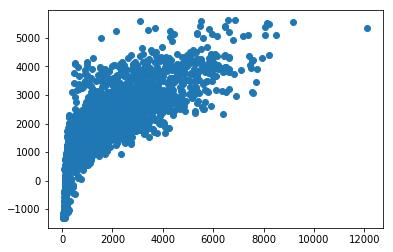

In [87]:
plt.scatter(y_val, y_pred_MR_validation)

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



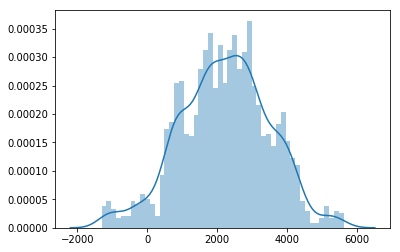

In [88]:
#residual plot
sns.distplot((y_pred_MR_validation), bins=50)

In [89]:
#Evaluation of Multiple Regression
from sklearn import metrics

In [90]:
print('MAE:', metrics.mean_absolute_error(y_val, y_pred_MR_validation))
print('MSE:', metrics.mean_squared_error(y_val, y_pred_MR_validation))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_MR_validation)))

MAE: 851.3358124581007
MSE: 1275598.971044494
RMSE: 1129.4241767575609


In [91]:
#cross validation of Multiple Linear Regression
from sklearn.model_selection import cross_val_score
cv_MR = cross_val_score(estimator=regressor_MR, X=X_train, y=y_train, cv=10, scoring='r2')

In [92]:
cv_MR.mean()

0.5601194602569842

In [93]:
cv_MR.std()

0.019824737072914583

# Polynomial Regression

In [94]:
from sklearn.preprocessing import PolynomialFeatures
poly_regression = PolynomialFeatures(degree=2)
X_train_poly = poly_regression.fit_transform(X_train)
X_val_poly = poly_regression.fit_transform(X_val)

In [95]:
from sklearn.linear_model import LinearRegression
regressor_PR = LinearRegression()
regressor_PR.fit(X_train_poly, y_train)
y_pred_PR_validation = regressor_PR.predict(X_val_poly)

In [96]:
#print the intercept
print(regressor_PR.intercept_)

1840790410146291.0


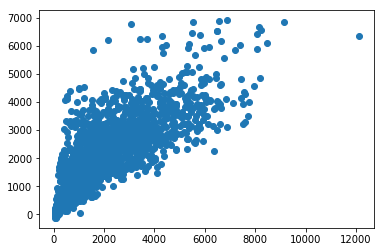

In [97]:
plt.scatter(y_val, y_pred_PR_validation)

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



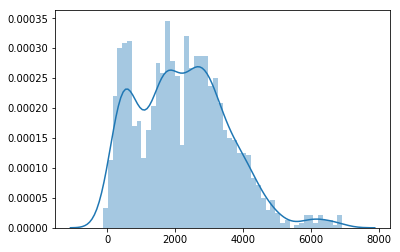

In [98]:
sns.distplot((y_pred_PR_validation), bins=50)

In [99]:
print('MAE:', metrics.mean_absolute_error(y_val, y_pred_PR_validation))
print('MSE:', metrics.mean_squared_error(y_val, y_pred_PR_validation))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_PR_validation)))


MAE: 769.3046548973606
MSE: 1169239.2431279076
RMSE: 1081.3136654680304


In [100]:
#cross validation
cv_PR = cross_val_score(estimator=regressor_PR, X=X_train_poly, y=y_train, cv=10, scoring='r2')

In [101]:
cv_PR.mean()

0.6000899326920156

In [102]:
cv_PR.std()

0.023658764740739986

# Support Vector Regression

In [103]:
from sklearn.svm import SVR
regressor_SVR = SVR(kernel='rbf')
regressor_SVR.fit(X_train, y_train)
y_pred_SVR_validation = regressor_SVR.predict(X_val)

In [104]:
#print the intercept
regressor_SVR.intercept_

array([1711.95126074])

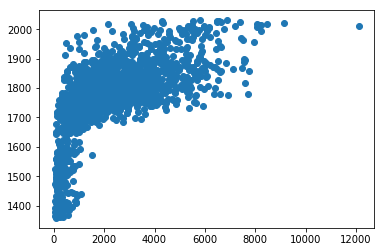

In [105]:
plt.scatter(y_val, y_pred_SVR_validation)

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



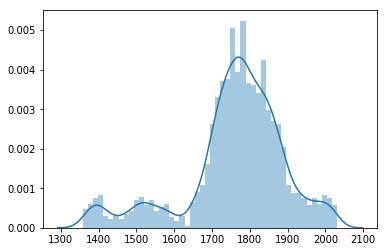

In [106]:
sns.distplot((y_pred_SVR_validation), bins=50)

In [107]:
print('MAE:', metrics.mean_absolute_error(y_val, y_pred_SVR_validation))
print('MSE:', metrics.mean_squared_error(y_val, y_pred_SVR_validation))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_val, y_pred_SVR_validation)))

MAE: 1262.6029737945569
MSE: 2830533.6701875627
RMSE: 1682.418993648004


In [108]:
#cross validation of SVR
cv_SVR = cross_val_score(estimator=regressor_SVR, X=X_train, y=y_train, cv=10, scoring='r2')

In [109]:
cv_SVR.mean()

0.027246918966582455

In [110]:
cv_SVR.std()

0.020587008105858555

# Decision Tree Regression

In [111]:
from sklearn.tree import DecisionTreeRegressor
regressor_DT  = DecisionTreeRegressor(random_state=0)
regressor_DT.fit(X_train, y_train)
y_pred_DT_validation = regressor_DT.predict(X_val)

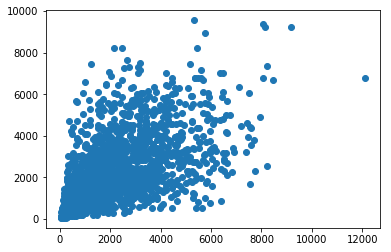

In [112]:
plt.scatter(y_val, y_pred_DT_validation)

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



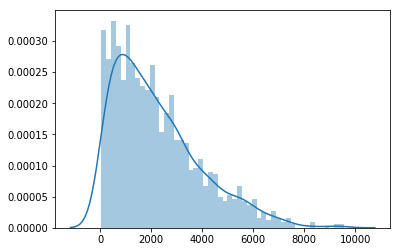

In [113]:
sns.distplot((y_pred_DT_validation),bins=50)

In [114]:
print('MAE:', metrics.mean_absolute_error(y_val, y_pred_DT_validation))
print('MSE:', metrics.mean_squared_error(y_val, y_pred_DT_validation))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_DT_validation)))

MAE: 1100.772802228739
MSE: 2397933.601694697
RMSE: 1548.526267679918


In [115]:
#cross validation
cv_DT = cross_val_score(estimator=regressor_DT, X=X_train, y=y_train, cv=10, scoring='r2')

In [116]:
cv_DT.mean()

0.1896635417726195

In [117]:
cv_DT.std()

0.04950020774802129

# Random Forest Regression

In [118]:
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(n_estimators=300, random_state=0)
regressor_RF.fit(X_train, y_train)
y_pred_RF_validation = regressor_RF.predict(X_val)

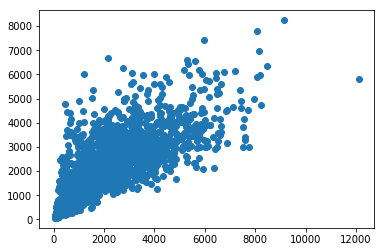

In [119]:
plt.scatter(y_val, y_pred_RF_validation)

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



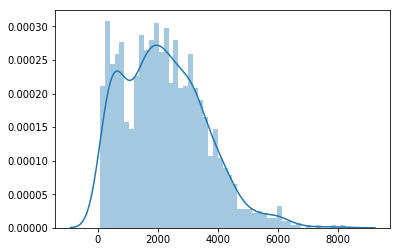

In [120]:
sns.distplot((y_pred_RF_validation), bins=50)

In [121]:
print('MAE:', metrics.mean_absolute_error(y_val, y_pred_RF_validation))
print('MSE:', metrics.mean_squared_error(y_val, y_pred_RF_validation))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_RF_validation)))

MAE: 813.2626622318671
MSE: 1298768.1812463475
RMSE: 1139.6351088161277


In [122]:
#cross validation
cv_RF = cross_val_score(estimator=regressor_RF, X=X_train, y=y_train, cv=10, scoring='r2')

In [123]:
cv_RF.mean()

0.5506255161685656

In [124]:
cv_RF.std()

0.02146461866323667

# Lasso Regression

In [125]:
from sklearn.linear_model import Lasso
regressor_Lasso = Lasso(alpha=0.5)
regressor_Lasso.fit(X_train, y_train)
y_pred_Lasso_validation = regressor_Lasso.predict(X_val)

In [126]:
#print the intercept
regressor_Lasso.intercept_

2179.0133069228514

In [127]:
#print the coefficients
coeff_Lasso = pd.DataFrame(data=regressor_Lasso.coef_, index= X.columns, columns=['Coefficients'])
coeff_Lasso

,Coefficients
Item_MRP,969.414742
Item_Visibility,-10.911044
Item_Weight,-7.402147
Outlet_Age,0.000000
Item_Fat_Content_Low_Fat,-21.359003
Item_Type_Drinks,-7.029673
Item_Type_Food_Item,-7.327676
Outlet_Identifier_OUT013,-0.000000
Outlet_Identifier_OUT017,35.403981
Outlet_Identifier_OUT018,-87.211345


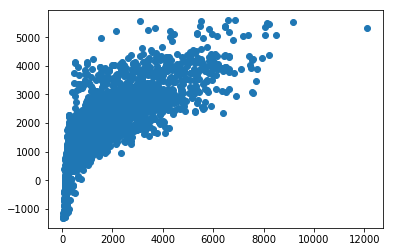

In [128]:
plt.scatter(y_val, y_pred_Lasso_validation)

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



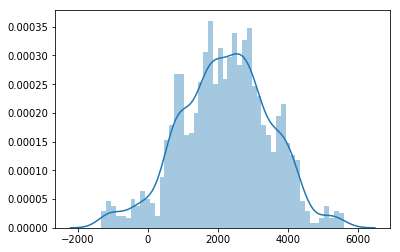

In [129]:
sns.distplot((y_pred_Lasso_validation), bins=50)

In [130]:
print('MAE:', metrics.mean_absolute_error(y_val, y_pred_Lasso_validation))
print('MSE:', metrics.mean_squared_error(y_val, y_pred_Lasso_validation))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_Lasso_validation)))

MAE: 851.2641676606985
MSE: 1275880.3288189205
RMSE: 1129.5487279524157


In [131]:
#cross validation
cv_Lasso = cross_val_score(estimator=regressor_Lasso, X=X_train, y=y_train, cv=10, scoring='r2')

In [132]:
cv_Lasso.mean()

0.5602243966252464

In [133]:
cv_Lasso.std()

0.019838157979327396

# Ridge Regression

In [134]:
from sklearn.linear_model import Ridge
regressor_Ridge = Ridge(alpha=0.5)
regressor_Ridge.fit(X_train, y_train)
y_pred_Ridge_validation = regressor_Ridge.predict(X_val)

In [135]:
#print the intercept
print(regressor_Ridge.intercept_)

2179.0133069228514


In [136]:
coeff_Ridge = pd.DataFrame(regressor_Ridge.coef_, index=X.columns, columns=['coefficients'])
coeff_Ridge

,coefficients
Item_MRP,969.849702
Item_Visibility,-11.321706
Item_Weight,-7.932911
Outlet_Age,134.712960
Item_Fat_Content_Low_Fat,-21.918199
Item_Type_Drinks,-7.822657
Item_Type_Food_Item,-8.237973
Outlet_Identifier_OUT013,2.478554
Outlet_Identifier_OUT017,78.213581
Outlet_Identifier_OUT018,-21.214356


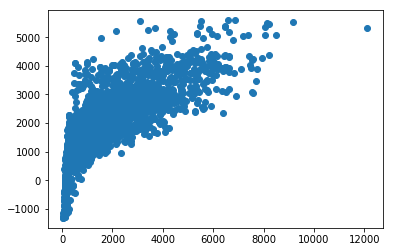

In [137]:
plt.scatter(y_val, y_pred_Ridge_validation)

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



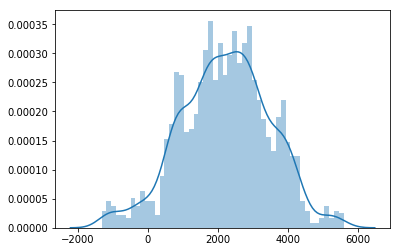

In [138]:
sns.distplot((y_pred_Ridge_validation), bins=50)

In [139]:
print('MAE:', metrics.mean_absolute_error(y_val, y_pred_Ridge_validation))
print('MSE:', metrics.mean_squared_error(y_val, y_pred_Ridge_validation))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_Ridge_validation)))

MAE: 851.3957100476359
MSE: 1276040.3039541761
RMSE: 1129.6195394707795


In [140]:
#cross validation
cv_Ridge = cross_val_score(estimator=regressor_Ridge, X=X_train, y=y_train, cv=10, scoring='r2')

In [141]:
cv_Ridge.mean()

0.5602058604138616

In [142]:
cv_Ridge.std()

0.019867002149371798

# Elasitc Net

In [143]:
from sklearn.linear_model import ElasticNet
regressor_EN = ElasticNet()
regressor_EN.fit(X_train, y_train)
y_pred_EN_validation = regressor_EN.predict(X_val)

In [144]:
#print the intercept
regressor_EN.intercept_

2179.0133069228514

In [145]:
#print the coefficients
coeff_EN = pd.DataFrame(data=regressor_EN.coef_, index=X.columns, columns=['Coefficients'])
coeff_EN

,Coefficients
Item_MRP,646.084638
Item_Visibility,-40.815804
Item_Weight,-0.983905
Outlet_Age,78.623496
Item_Fat_Content_Low_Fat,-16.385217
Item_Type_Drinks,-10.642816
Item_Type_Food_Item,1.016113
Outlet_Identifier_OUT013,0.000000
Outlet_Identifier_OUT017,41.167035
Outlet_Identifier_OUT018,-31.668538


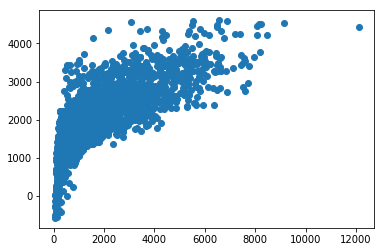

In [146]:
plt.scatter(y_val, y_pred_EN_validation)

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



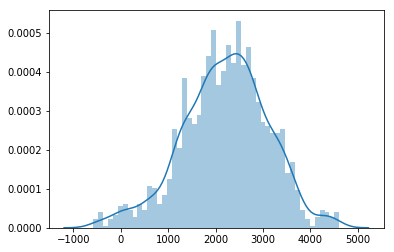

In [147]:
sns.distplot((y_pred_EN_validation), bins=50)

In [148]:
print('MAE:', metrics.mean_absolute_error(y_val, y_pred_EN_validation))
print('MSE:', metrics.mean_squared_error(y_val, y_pred_EN_validation))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_EN_validation)))

MAE: 910.5411083858023
MSE: 1439829.1676683498
RMSE: 1199.928817750599


In [149]:
#cross validation
cv_EN = cross_val_score(estimator=regressor_EN, X=X_train, y=y_train, cv=10, scoring='r2')

In [150]:
cv_EN.mean()

0.5091653272735213

In [151]:
cv_EN.std()

0.015180391912244313

Among those models we can see that the Ridge Regression has less Root Mean Squared Error value and high R-squared value. So we can tune the parameters of Ridge Regression

# Grid Search

In [152]:
from sklearn.model_selection import GridSearchCV
parameters = [
    {
        'alpha' : [0.5, 1.0, 1.5 , 2.0, 2.5],
        'max_iter' : [1000, 1500, 2000, 2500]
    }
]
gridsearch = GridSearchCV(estimator=regressor_Ridge, param_grid=parameters, cv=10, scoring='r2', n_jobs=-1)

In [153]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'alpha': [0.5, 1.0, 1.5, 2.0, 2.5], 'max_iter': [1000, 1500, 2000, 2500]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [154]:
gridsearch.best_score_

0.5602104936357272

In [155]:
gridsearch.best_params_

{'alpha': 2.5, 'max_iter': 1000}

In [156]:
from sklearn.linear_model import Ridge
best_model_Ridge = Ridge(alpha=2.5, max_iter=2500)
best_model_Ridge.fit(X_train, y_train)
y_pred_Ridge_best = best_model_Ridge.predict(X_test)

In [157]:
y_pred_Ridge_best

array([1835.93339945, 1597.57095369, 1931.17201256, ..., 1839.96568984,
       3570.82633191, 1291.94285191])

# That's the end of the code